In [1]:
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 머신러닝 패키지 추가
import statsmodels.api as sm
import sklearn as sk


In [3]:
# 한글 폰트, 마이너스 
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

In [4]:
# column_stack() ~= Pandas.DataFrame()
np.column_stack(([1,2,3],[4,5,6]))


array([[1, 4],
       [2, 5],
       [3, 6]])

In [5]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [6]:
# [[l,w] for l,w in zip(fish_length,fish_weight)] 사용 x
fish_data = np.column_stack((fish_length,fish_weight))
fish_data

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [7]:
fish_target = np.concatenate((np.ones(35),np.zeros(14)))
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

사이킷런 train_test_split()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# 데이터 분활 하여 변수로 저장
train_input,test_input,train_target,test_target = train_test_split(fish_data,fish_target,random_state=42)

In [10]:
train_input.shape

(36, 2)

In [11]:
train_target.shape

(36,)

In [12]:
test_input.shape

(13, 2)

In [13]:
test_target.shape

(13,)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
kn = KNeighborsClassifier() # 개체 생성

In [16]:
kn.fit(X=train_input,y=train_target) # 훈련 실시

KNeighborsClassifier()

In [17]:
kn.score(X=test_input,y=test_target) # 테스트 정확도 1.0 -> 100 %

1.0

In [18]:
# 도미값 입력 예측
kn.predict([[25.0,150.0]])
# 빙어로 예측값이 나옴

array([0.])

#### 산점도를 통해서 왜 도미가 빙어로 바뀌었는지?

In [19]:
weired_bream = np.array([25.0,150.0])

Text(0, 0.5, '무게')

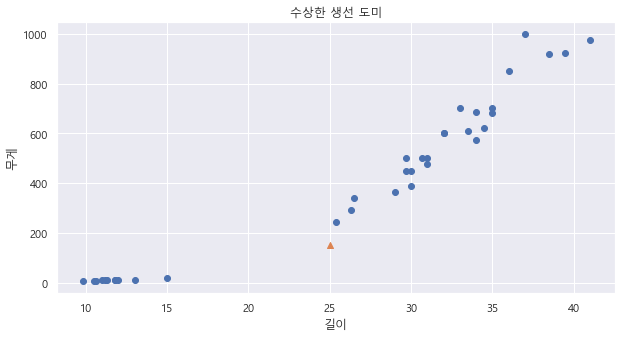

In [20]:
plt.figure(figsize=(10,5))
plt.scatter(x=train_input[:,0],y=train_input[:,1])
plt.scatter(x=25.0,y=150.0,marker='^')
plt.title('수상한 생선 도미')
plt.xlabel('길이')
plt.ylabel('무게')

##### k-최근접 이웃을 찾아주는 함수
**kneighbors()**

In [21]:
distance,indices = kn.kneighbors([weired_bream])

In [22]:
distance

array([[ 92.00086956, 130.48375378, 138.32150953, 140.00603558,
        140.62090883]])

In [23]:
indices

array([[12, 29,  5, 19,  4]], dtype=int64)

In [24]:
train_input[indices]

array([[[ 25.4, 242. ],
        [ 15. ,  19.9],
        [ 13. ,  12.2],
        [ 26.3, 290. ],
        [ 11.8,  10. ]]])

##### 찾아낸 이웃값들을 산점도에 표시

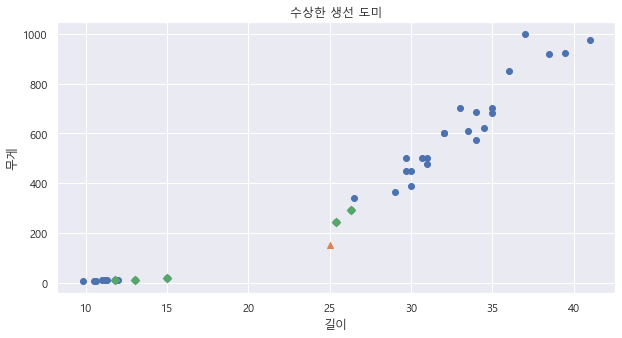

In [25]:
plt.figure(figsize=(10,5))
plt.scatter(x=train_input[:,0],y=train_input[:,1])
plt.scatter(x=weired_bream[0],y=weired_bream[1],marker='^')
plt.scatter(x=train_input[indices,0],y=train_input[indices,1],marker='D')
plt.title('수상한 생선 도미')
plt.xlabel('길이')
plt.ylabel('무게')
plt.show()

##### 이유
x축은 단위 5로 y축은 단위 200

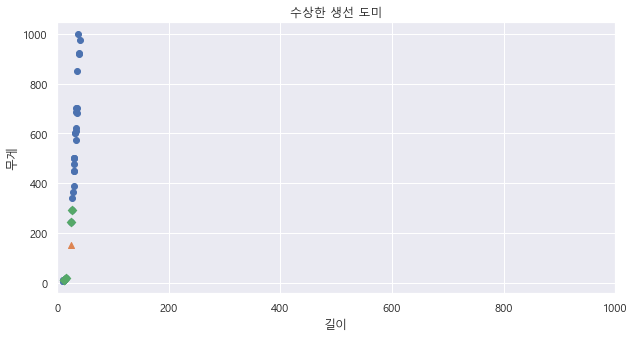

In [26]:
plt.figure(figsize=(10,5))
plt.scatter(x=train_input[:,0],y=train_input[:,1])
plt.scatter(x=weired_bream[0],y=weired_bream[1],marker='^')
plt.scatter(x=train_input[indices,0],y=train_input[indices,1],marker='D')
plt.xlim((0,1000))

plt.title('수상한 생선 도미')
plt.xlabel('길이')
plt.ylabel('무게')
plt.show()

#### 데이터 전처리가 필요한 이유

In [27]:
# 훈련세트 데이터의 전체 평균
mean = np.mean(a=train_input,axis=0)
mean

array([ 26.175     , 418.08888889])

생선 길이 평균 -> 26.175

생선 무게 평균 -> 418.00

In [29]:
# 훈련세트 데이터의 전체 표준편차
std = np.std(a=train_input,axis=0)
std

array([ 10.21073441, 321.67847023])

생선 길이 표준편차 -> 10.210

생선 무게 표준편차 -> 321.678

In [30]:
print(mean,std)

[ 26.175      418.08888889] [ 10.21073441 321.67847023]


##### 표준점수
- 도출ㄹ한 평균과 표준편차로 변경된 스케일 데이터를 추출
    - 스케일세트 = (실제값 - 평균) / 표준편차

In [33]:
train_scaled = (train_input - mean) / std

재훈련

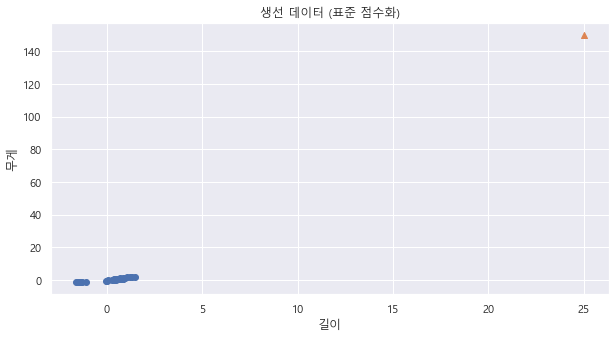

In [35]:
plt.figure(figsize=(10,5))
plt.scatter(x=train_scaled[:,0],y=train_scaled[:,1])
plt.scatter(x=weired_bream[0],y=weired_bream[1],marker='^')
plt.title('생선 데이터 (표준 점수화)')
plt.xlabel('길이')
plt.ylabel('무게')
plt.show()

##### weird_bream도 표준 점수화

In [36]:
std_weired_bream = (weired_bream - mean)/std
std_weired_bream

array([-0.11507497, -0.83340638])

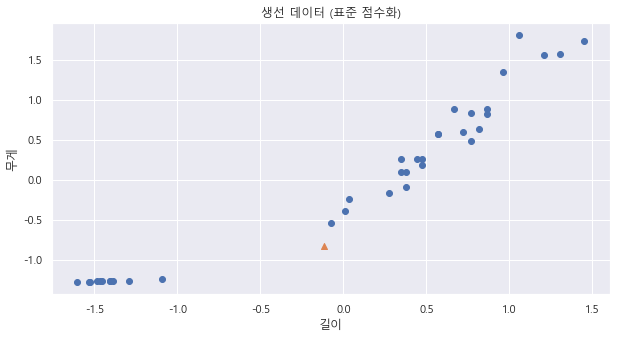

In [37]:
plt.figure(figsize=(10,5))
plt.scatter(x=train_scaled[:,0],y=train_scaled[:,1])
plt.scatter(x=std_weired_bream[0],y=std_weired_bream[1],marker='^')
plt.title('생선 데이터 (표준 점수화)')
plt.xlabel('길이')
plt.ylabel('무게')
plt.show()

In [38]:
test_input

array([[ 32. , 340. ],
       [ 12.4,  13.4],
       [ 14.3,  19.7],
       [ 12.2,  12.2],
       [ 33. , 700. ],
       [ 36. , 714. ],
       [ 35. , 720. ],
       [ 35. , 725. ],
       [ 38.5, 955. ],
       [ 33.5, 650. ],
       [ 31.5, 500. ],
       [ 29. , 430. ],
       [ 41. , 950. ]])

In [39]:
train_scaled

array([[ 0.37460577,  0.09920189],
       [ 0.27666962, -0.17125451],
       [ 0.34522492,  0.2546366 ],
       [-1.45680021, -1.27266487],
       [-1.40783213, -1.26862357],
       [-1.29030875, -1.26178444],
       [ 0.57047806,  0.56550602],
       [ 0.44316107,  0.2546366 ],
       [ 0.66841421,  0.87637544],
       [ 0.86428651,  0.87637544],
       [ 1.4519034 ,  1.73126635],
       [ 1.20706303,  1.56028817],
       [-0.07590051, -0.54740651],
       [-1.3882449 , -1.26924531],
       [ 1.30499918,  1.57583164],
       [ 0.34522492,  0.09920189],
       [ 1.06015881,  1.80898371],
       [ 0.47254192,  0.2546366 ],
       [-1.53514913, -1.2763953 ],
       [ 0.01224202, -0.39818919],
       [ 0.76635036,  0.82974503],
       [ 0.03182925, -0.24275448],
       [-1.52535551, -1.27794965],
       [-1.60370443, -1.27888226],
       [ 0.86428651,  0.81420156],
       [-1.46659382, -1.26924531],
       [ 0.47254192,  0.17691924],
       [ 0.81531843,  0.6276799 ],
       [ 0.71738229,

In [54]:
kn.fit(train_scaled,train_target)

KNeighborsClassifier()

In [55]:
test_scaled = (test_input - mean)/std

In [56]:
kn.score(X=test_scaled,y=test_target)

1.0

In [57]:
kn.predict([std_weired_bream])

array([1.])

#### 산점도에서 다시 확인

In [58]:
dist,inds = kn.kneighbors([std_weired_bream])

In [59]:
print(dist,inds)

[[0.28867034 0.45345741 0.60864646 0.76935617 0.89243065]] [[12 19 21  1 31]]


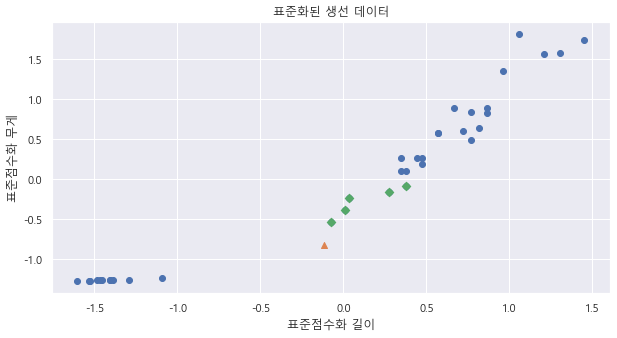

In [60]:
plt.figure(figsize=(10,5))
plt.scatter(x=train_scaled[:,0],y=train_scaled[:,1])
plt.scatter(x=std_weired_bream[0],y=std_weired_bream[1],marker='^')
plt.scatter(x=train_scaled[inds,0],y=train_scaled[inds,1],marker='D')

plt.title('표준화된 생선 데이터')
plt.xlabel('표준점수화 길이')
plt.ylabel('표준점수화 무게')
plt.show()